# Supply Chain Networks: Multi-Tier Networks and Resilience

This notebook demonstrates **supply chains as networks** - multi-tier systems where products flow from suppliers to customers.

Understanding supply chain networks is essential because:
- **Supply chains are networks** - suppliers, manufacturers, distributors, retailers form connected tiers
- **Network structure affects resilience** - single points of failure create vulnerability
- **More suppliers ≠ more resilience** - resilience depends on network structure, not just numbers
- **Understanding vulnerabilities** helps build resilient supply chains


## Key Concepts

**Supply Chains as Multi-Tier Networks**:
- **Tier 1**: Suppliers (sources of raw materials)
- **Tier 2**: Manufacturers (transform materials into products)
- **Tier 3**: Distributors (store and distribute products)
- **Tier 4**: Retailers (sell to customers)
- Products flow through tiers from suppliers to customers

**Network Structure Determines Resilience**:
- **Single points of failure**: One node that, if it fails, breaks the system
- **Alternative paths**: Multiple routes provide resilience
- **Bottlenecks**: Points where all flow must pass through create vulnerability

**Resilience Misconception**:
- Having more suppliers does NOT automatically mean more resilience
- If all suppliers go through the same bottleneck, resilience is limited
- True resilience comes from alternative paths throughout the network

**Critical insight**: Understanding supply chain network structure helps you identify vulnerabilities and build true resilience, not just the appearance of resilience.


## Scenario: Manufacturing Supply Chain

A manufacturing company sources materials from suppliers, manufactures products, and distributes to retailers.

**The Supply Chain Network**:
- 3 Suppliers (S1, S2, S3)
- 2 Manufacturers (M1, M2)
- 2 Distributors (D1, D2)
- 4 Retailers (R1, R2, R3, R4)

**The Challenge**:
- All suppliers currently route through Manufacturer M1
- If M1 fails, the entire supply chain stops
- How can we identify vulnerabilities and build resilience?

**The Question**: Where are the single points of failure? How can we create alternative paths?


## Step 1: Install Required Packages (Colab)


In [1]:
%pip install networkx matplotlib pandas -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10


## Step 3: Create Multi-Tier Supply Chain Network

Let's model a supply chain with multiple tiers:


In [3]:
# Create supply chain network
G = nx.DiGraph()

# Define tiers
suppliers = ['S1', 'S2', 'S3']
manufacturers = ['M1', 'M2']
distributors = ['D1', 'D2']
retailers = ['R1', 'R2', 'R3', 'R4']

G.add_nodes_from(suppliers)
G.add_nodes_from(manufacturers)
G.add_nodes_from(distributors)
G.add_nodes_from(retailers)

# Initial network: All suppliers → M1 (single point of failure)
# Suppliers to Manufacturers
G.add_edges_from([
    ('S1', 'M1'), ('S2', 'M1'), ('S3', 'M1')
])

# Manufacturers to Distributors
G.add_edges_from([
    ('M1', 'D1'), ('M1', 'D2')
])

# Distributors to Retailers
G.add_edges_from([
    ('D1', 'R1'), ('D1', 'R2'),
    ('D2', 'R2'), ('D2', 'R3'), ('D2', 'R4')
])

print("INITIAL SUPPLY CHAIN NETWORK:")
print("=" * 60)
print(f"Suppliers: {suppliers}")
print(f"Manufacturers: {manufacturers}")
print(f"Distributors: {distributors}")
print(f"Retailers: {retailers}")
print(f"\\nNetwork has {G.number_of_nodes()} nodes and {G.number_of_edges()} links")
print(f"\\n⚠️  VULNERABILITY: All suppliers route through M1!")
print(f"   If M1 fails, entire supply chain stops.")


INITIAL SUPPLY CHAIN NETWORK:
Suppliers: ['S1', 'S2', 'S3']
Manufacturers: ['M1', 'M2']
Distributors: ['D1', 'D2']
Retailers: ['R1', 'R2', 'R3', 'R4']
\nNetwork has 11 nodes and 10 links
\n⚠️  VULNERABILITY: All suppliers route through M1!
   If M1 fails, entire supply chain stops.


## Step 4: Visualize Multi-Tier Network

Visualizing the multi-tier structure helps identify vulnerabilities:


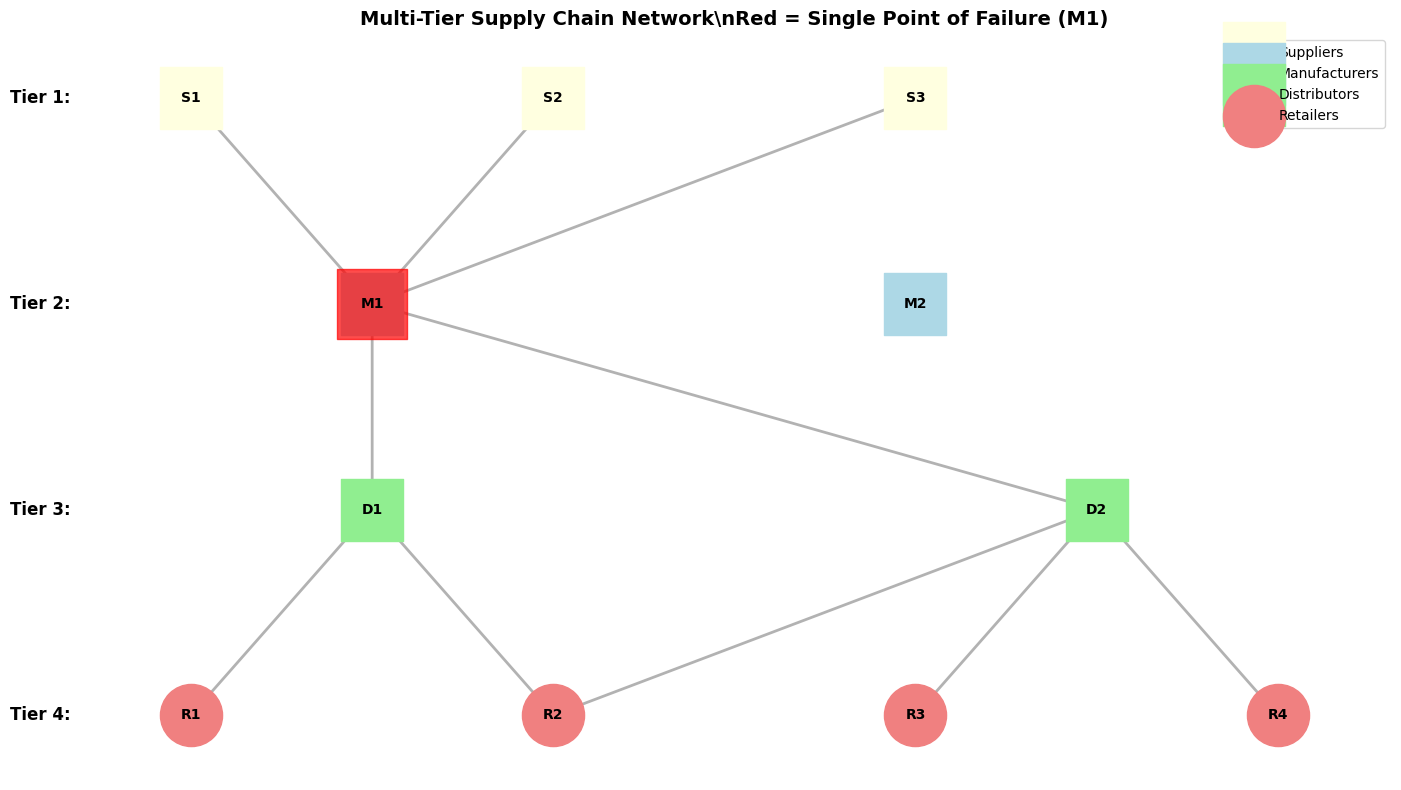

\nKey Observations:
  • All suppliers (S1, S2, S3) route through M1
  • M1 is a single point of failure (red node)
  • If M1 fails, all suppliers become useless
  • Having 3 suppliers doesn't help if they all depend on M1


In [4]:
# Create tiered layout
pos = {}
y_positions = {'suppliers': 3, 'manufacturers': 2, 'distributors': 1, 'retailers': 0}

# Suppliers
for i, s in enumerate(suppliers):
    pos[s] = (i * 2, y_positions['suppliers'])

# Manufacturers
for i, m in enumerate(manufacturers):
    pos[m] = (i * 3 + 1, y_positions['manufacturers'])

# Distributors
for i, d in enumerate(distributors):
    pos[d] = (i * 4 + 1, y_positions['distributors'])

# Retailers
for i, r in enumerate(retailers):
    pos[r] = (i * 2, y_positions['retailers'])

# Visualize
fig, ax = plt.subplots(figsize=(14, 8))

# Draw nodes by tier
nx.draw_networkx_nodes(G, pos, nodelist=suppliers, node_color='lightyellow', 
                      node_size=2000, node_shape='s', label='Suppliers')
nx.draw_networkx_nodes(G, pos, nodelist=manufacturers, node_color='lightblue', 
                      node_size=2000, node_shape='s', label='Manufacturers')
nx.draw_networkx_nodes(G, pos, nodelist=distributors, node_color='lightgreen', 
                      node_size=2000, node_shape='s', label='Distributors')
nx.draw_networkx_nodes(G, pos, nodelist=retailers, node_color='lightcoral', 
                      node_size=2000, node_shape='o', label='Retailers')

# Highlight M1 as single point of failure
nx.draw_networkx_nodes(G, pos, nodelist=['M1'], node_color='red', 
                      node_size=2500, node_shape='s', alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, 
                       arrowsize=20, width=2, alpha=0.6)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Add tier labels
ax.text(-1, y_positions['suppliers'], 'Tier 1:', fontsize=12, fontweight='bold', va='center')
ax.text(-1, y_positions['manufacturers'], 'Tier 2:', fontsize=12, fontweight='bold', va='center')
ax.text(-1, y_positions['distributors'], 'Tier 3:', fontsize=12, fontweight='bold', va='center')
ax.text(-1, y_positions['retailers'], 'Tier 4:', fontsize=12, fontweight='bold', va='center')

plt.title('Multi-Tier Supply Chain Network\\nRed = Single Point of Failure (M1)', 
         fontsize=14, fontweight='bold')
plt.axis('off')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print("\\nKey Observations:")
print("  • All suppliers (S1, S2, S3) route through M1")
print("  • M1 is a single point of failure (red node)")
print("  • If M1 fails, all suppliers become useless")
print("  • Having 3 suppliers doesn't help if they all depend on M1")


In [5]:
print("SINGLE POINT OF FAILURE ANALYSIS")
print("=" * 60)

# Analyze each node: if removed, how many downstream nodes become unreachable?
vulnerability_analysis = []

for node in G.nodes():
    # Create network without this node
    G_test = G.copy()
    G_test.remove_node(node)
    
    # Count how many nodes become unreachable from suppliers
    reachable_from_suppliers = set()
    for supplier in suppliers:
        if supplier in G_test:
            reachable = nx.descendants(G_test, supplier)
            reachable_from_suppliers.update(reachable)
            reachable_from_suppliers.add(supplier)
    
    # Count retailers that become unreachable
    unreachable_retailers = [r for r in retailers if r not in reachable_from_suppliers]
    num_unreachable = len(unreachable_retailers)
    
    vulnerability_analysis.append({
        'Node': node,
        'Tier': 'Supplier' if node in suppliers else 
                'Manufacturer' if node in manufacturers else
                'Distributor' if node in distributors else 'Retailer',
        'Unreachable_Retailers': num_unreachable,
        'Is_Critical': num_unreachable > 0
    })

vuln_df = pd.DataFrame(vulnerability_analysis)
display(vuln_df)

critical_nodes = vuln_df[vuln_df['Is_Critical']]['Node'].tolist()
print(f"\\n⚠️  CRITICAL NODES (Single Points of Failure):")
for node in critical_nodes:
    unreachable = vuln_df[vuln_df['Node'] == node]['Unreachable_Retailers'].values[0]
    print(f"   {node}: If fails, {unreachable} retailer(s) become unreachable")

print("\\nKey Insight:")
print("  • M1 is critical: if it fails, all retailers become unreachable")
print("  • Having multiple suppliers doesn't help if they all depend on M1")
print("  • True resilience requires alternative paths")


SINGLE POINT OF FAILURE ANALYSIS


,Node,Tier,Unreachable_Retailers,Is_Critical
0,S1,Supplier,0,False
1,S2,Supplier,0,False
2,S3,Supplier,0,False
3,M1,Manufacturer,4,True
4,M2,Manufacturer,0,False
5,D1,Distributor,1,True
6,D2,Distributor,2,True
7,R1,Retailer,1,True
8,R2,Retailer,1,True
9,R3,Retailer,1,True


\n⚠️  CRITICAL NODES (Single Points of Failure):
   M1: If fails, 4 retailer(s) become unreachable
   D1: If fails, 1 retailer(s) become unreachable
   D2: If fails, 2 retailer(s) become unreachable
   R1: If fails, 1 retailer(s) become unreachable
   R2: If fails, 1 retailer(s) become unreachable
   R3: If fails, 1 retailer(s) become unreachable
   R4: If fails, 1 retailer(s) become unreachable
\nKey Insight:
  • M1 is critical: if it fails, all retailers become unreachable
  • Having multiple suppliers doesn't help if they all depend on M1
  • True resilience requires alternative paths


## Step 6: Build Resilience with Alternative Paths

Let's create alternative paths to improve resilience:


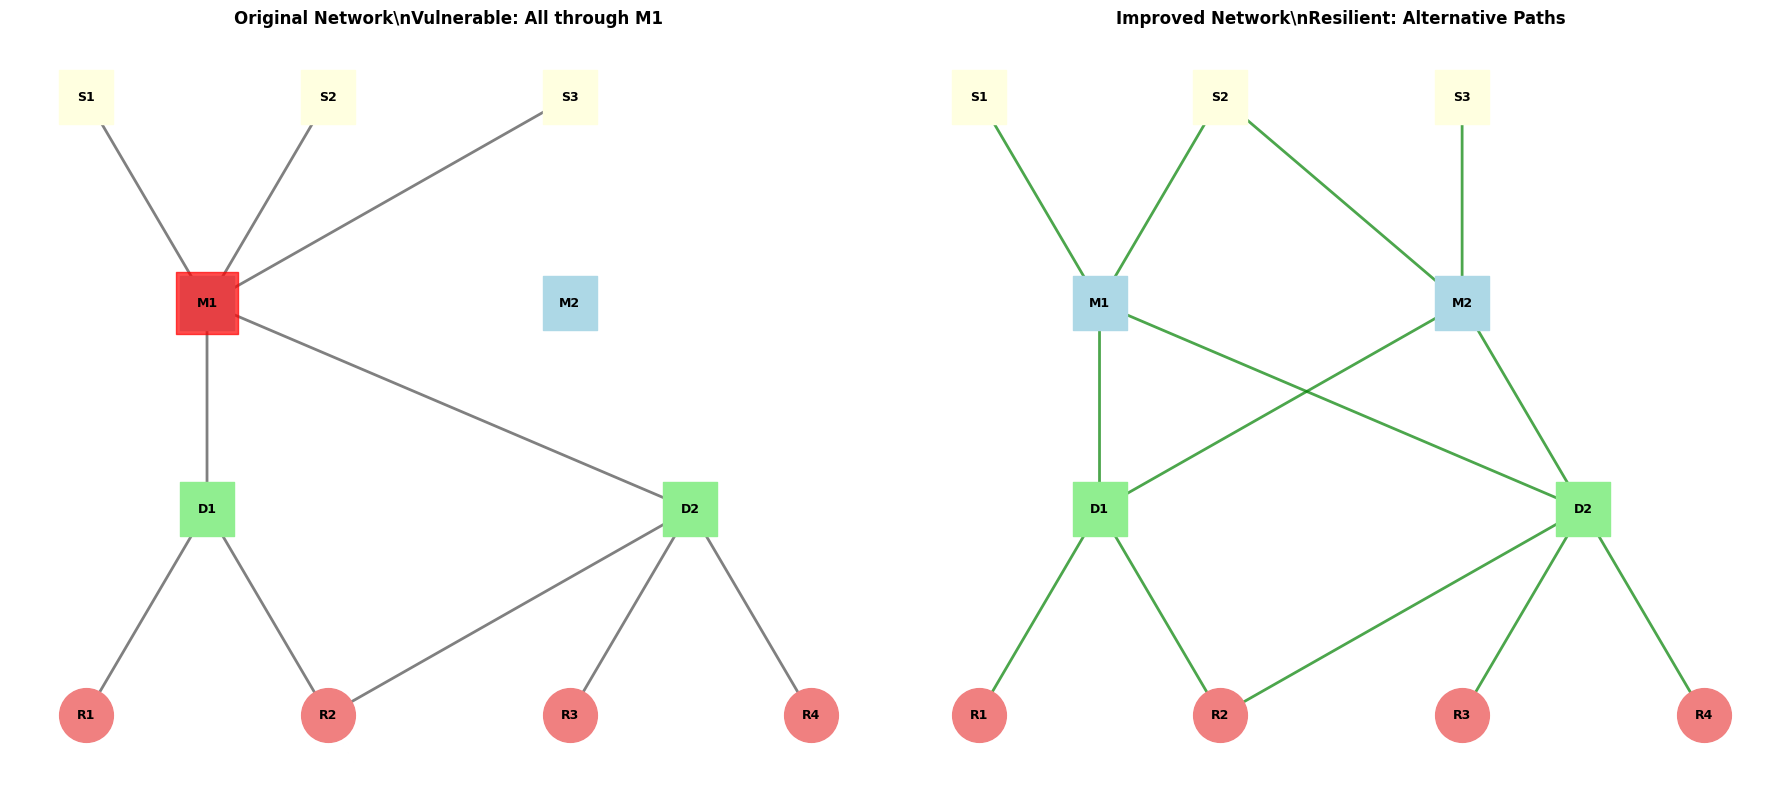

RESILIENCE COMPARISON
\nIf M1 fails:
  Original network: 0/4 retailers reachable
  Improved network: 4/4 retailers reachable
\nKey Insight:
  • Original: If M1 fails, all retailers become unreachable
  • Improved: If M1 fails, retailers can still be reached via M2
  • Alternative paths provide true resilience
  • Network structure matters more than number of suppliers


In [6]:
# Create improved network with alternative paths
G_resilient = nx.DiGraph()
G_resilient.add_nodes_from(suppliers + manufacturers + distributors + retailers)

# Add alternative paths: Some suppliers can use M2
G_resilient.add_edges_from([
    ('S1', 'M1'), ('S2', 'M1'),  # S1, S2 → M1
    ('S2', 'M2'), ('S3', 'M2')   # S2, S3 → M2 (alternative paths!)
])

# Manufacturers to Distributors (both manufacturers serve both distributors)
G_resilient.add_edges_from([
    ('M1', 'D1'), ('M1', 'D2'),
    ('M2', 'D1'), ('M2', 'D2')  # Alternative paths!
])

# Distributors to Retailers
G_resilient.add_edges_from([
    ('D1', 'R1'), ('D1', 'R2'),
    ('D2', 'R2'), ('D2', 'R3'), ('D2', 'R4')
])

# Visualize improved network
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Original network (vulnerable)
nx.draw_networkx_nodes(G, pos, nodelist=suppliers, node_color='lightyellow', 
                      node_size=1500, node_shape='s', ax=ax1)
nx.draw_networkx_nodes(G, pos, nodelist=manufacturers, node_color='lightblue', 
                      node_size=1500, node_shape='s', ax=ax1)
nx.draw_networkx_nodes(G, pos, nodelist=distributors, node_color='lightgreen', 
                      node_size=1500, node_shape='s', ax=ax1)
nx.draw_networkx_nodes(G, pos, nodelist=retailers, node_color='lightcoral', 
                      node_size=1500, node_shape='o', ax=ax1)
nx.draw_networkx_nodes(G, pos, nodelist=['M1'], node_color='red', 
                      node_size=2000, node_shape='s', alpha=0.7, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=15, width=2, ax=ax1)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', ax=ax1)
ax1.set_title('Original Network\\nVulnerable: All through M1', fontweight='bold', fontsize=12)
ax1.axis('off')

# Improved network (resilient)
nx.draw_networkx_nodes(G_resilient, pos, nodelist=suppliers, node_color='lightyellow', 
                      node_size=1500, node_shape='s', ax=ax2)
nx.draw_networkx_nodes(G_resilient, pos, nodelist=manufacturers, node_color='lightblue', 
                      node_size=1500, node_shape='s', ax=ax2)
nx.draw_networkx_nodes(G_resilient, pos, nodelist=distributors, node_color='lightgreen', 
                      node_size=1500, node_shape='s', ax=ax2)
nx.draw_networkx_nodes(G_resilient, pos, nodelist=retailers, node_color='lightcoral', 
                      node_size=1500, node_shape='o', ax=ax2)
nx.draw_networkx_edges(G_resilient, pos, edge_color='green', arrows=True, 
                       arrowsize=15, width=2, alpha=0.7, ax=ax2)
nx.draw_networkx_labels(G_resilient, pos, font_size=9, font_weight='bold', ax=ax2)
ax2.set_title('Improved Network\\nResilient: Alternative Paths', fontweight='bold', fontsize=12)
ax2.axis('off')

plt.tight_layout()
plt.show()

# Analyze resilience improvement
print("RESILIENCE COMPARISON")
print("=" * 60)

# Test: What happens if M1 fails?
G_test_original = G.copy()
G_test_original.remove_node('M1')
G_test_resilient = G_resilient.copy()
G_test_resilient.remove_node('M1')

# Count reachable retailers
reachable_original = set()
for s in suppliers:
    if s in G_test_original:
        reachable_original.update(nx.descendants(G_test_original, s))

reachable_resilient = set()
for s in suppliers:
    if s in G_test_resilient:
        reachable_resilient.update(nx.descendants(G_test_resilient, s))

print(f"\\nIf M1 fails:")
print(f"  Original network: {len([r for r in retailers if r in reachable_original])}/{len(retailers)} retailers reachable")
print(f"  Improved network: {len([r for r in retailers if r in reachable_resilient])}/{len(retailers)} retailers reachable")

print("\\nKey Insight:")
print("  • Original: If M1 fails, all retailers become unreachable")
print("  • Improved: If M1 fails, retailers can still be reached via M2")
print("  • Alternative paths provide true resilience")
print("  • Network structure matters more than number of suppliers")


## Step 7: Key Takeaways

**Supply chains are multi-tier networks**:
- Products flow through tiers: Suppliers → Manufacturers → Distributors → Retailers
- Network structure determines what is possible

**Single points of failure create vulnerability**:
- If a critical node fails, downstream nodes become unreachable
- Having many suppliers doesn't help if they all depend on one manufacturer

**True resilience comes from alternative paths**:
- Multiple paths to the same destination provide resilience
- If one path fails, alternatives are available
- Network structure matters more than number of nodes

**Understanding network structure helps**:
- Identify vulnerabilities before disruptions occur
- Build resilience by creating alternative paths
- Make better supply chain decisions
